In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from simworlds.gambler_world import GamblerWorld
from rl.actor import Actor
from rl.critic import Critic

In [3]:
a = Actor(alpha=0.05, gamma=0.9, lambda_lr=0.9, epsilon=0.5)
c = Critic(isTableNotNeural=True, alpha=0.05, gamma=0.9, lambda_lr=0.9)

In [4]:
episodes = range(2000)
steps = range(100)

for episode in episodes:
    
    world = GamblerWorld()
    state_0 = world.state
    
    c.reset_episode(state_0)
    a.reset_episode()

    state = state_0
    legal_actions = world.get_legal_actions()
    action = a.select_action(state, legal_actions)

    flag = False
    while not flag:

        new_state, reward = world.do_action(action)  # Step 1

        legal_actions = world.get_legal_actions()
        
        if new_state.is_final_state:
            flag = True
        else:        
            new_action = a.select_action(new_state, legal_actions)  # Step 2

        a.update_eligibility(state, action)  # Step 3

        td = c.calculate_td(state, new_state, reward)  # step 4,5

        # step 6
        c.update(td)
        a.update(td)

        # Step 7
        action = new_action
        state = new_state
        


In [5]:
p = a.get_greedy_policy()

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
x = []
y = []
for state, action in p.items():
    x.append(state.units)
    y.append(action.units)

x = np.array(x)
y = np.array(y)


<AxesSubplot:>

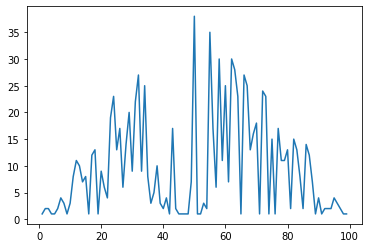

In [8]:
sns.lineplot(x=x, y=y)